# The cell below is for 1-dimensional generation.

In [1]:
import random
import strsimpy

def string_gen_iter(set: list) -> str:
    
    i = random.randint(0,1) # partition the list
    j = random.randint(0,1) # idx of first in first set
    k = random.randint(0,1) # idx of first in second set
    return set[i*2 + j] + set[i*2 + (not j)] + set[(not i)*2 + k] + set[(not i)*2 + (not k)]


    
     
def string_gen_alte(set: list) -> str:
    string = ""
    i = random.randint(0,1) # partition the list
    j = random.randint(0,1) # idx of first in first set
    k = random.randint(0,1) # idx of first in second set
    string += set[i*2 + j] + set[(not i)*2 + k] + set[i*2 + (not j)]  + set[(not i)*2 + (not k)]
    return string 

def string_gen_pali(set: list) -> str:
    string = ""
    i = random.randint(0,1) # partition the list
    j = random.randint(0,1) # idx of first in first set
    k = random.randint(0,1) # idx of first in second set
    string += set[i*2 + j]+ set[(not i)*2 + k] + set[(not i)*2 + (not k)] + set[i*2 + (not j)] 
    return string

def string_gen_rand(set: list) -> str:
    return ''.join(random.sample(set, len(set))) # random.shuffle(set) doesn't return anything :(


# The cell below is for 2-dimensional generation.

In [2]:
def string_gen_stac(set: list) -> str:
    i = random.randint(0,1) #letter-centered
    j = random.randint(0,1) #letter goes first
    k = random.randint(0,1) #which number goes first
    if i: #letter-centered
        string = set[0] + set[2] +set[3] + set[1]
        if not j: #idx 0 goes first
            if not k: #A1B1B2A2
                return string
            else: #A2B2B1A1
                return string[::-1]
        else:
            if not k: #B1A1A2B2
                return string[0:2][::-1] + string[2::][::-1]
            else: #B2A2A1B1
                return (string[0:2][::-1] + string[2::][::-1])[::-1]
    else: #number-centered
        string2 = set[0] + set[1] + set[3] + set[2]
        if not k: #1 goes first
            if not j: #A1A2B2B1
                return string2
            else: #B1B2A2A1
                return string2[::-1]
        else: #2 goes first
            if not j: #A2A1B1B2
                return string2[0:2][::-1] + string2[2::][::-1]
            else: #B2B1A1A2
                return (string2[0:2][::-1] + string2[2::][::-1])[::-1]
    # Program shouldn't get to this point, so returning a long phrase will create an outlier value on the graph that can be easily visible
    return "Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum."   

def string_gen_queu(set: list) -> str:
    i = random.randint(0,1) #0 = letter,  1 = number (getting serial-crossed)
    j = random.randint(0,1) #0 = A first, 1 = B first
    k = random.randint(0,1) #0 = 1 first, 1 = 2 first
    if not i:
        string = set[0] + set[2] +set[1] + set[3]
        if not j:
            if not k: #A1B1A2B2
                return string
            else: #A2B2A1B1
                return string[2::] + string[:2:]
        else:
            if not k: #B1A1B2A2
                return string[:2:][::-1] + string[2::][::-1]
            else: #B2A2B1A1
                return string[::-1]
    else:
        string2 = set[0] + set[1] + set[2] + set[3]
        if not j:
            if not k: #A1A2B1B2
                return string2
            else: #A2A1B2B1
                return string2[0:2][::-1] + string2[2::][::-1]
        else:
            if not k: #B1B2A1A2
                return string2[2::] + string2[0:2:]
            else: #B2B1A2A1
                return string2[::-1]
    # Program shouldn't get to this point, so returning a long phrase will create an outlier value on the graph that can be easily visible
    return "Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum."   

# The cell below is in charge of simulating rounds.

In [3]:
# strings_per_set should be 6
def sim_round_lev(set1: list, set2: list, set3: list, process: str, strings_per_set = 6): # returns [average_similarity,num_unique_sequences]
    if process == 2: #pali
        set = [string_gen_pali(set1) for _ in range(strings_per_set)];
        set = set + [string_gen_pali(set2) for _ in range(strings_per_set)];
        set = set + [string_gen_pali(set3) for _ in range(strings_per_set)];
    elif process == 1: #alte
        set = [string_gen_alte(set1) for _ in range(strings_per_set)];
        set = set + [string_gen_alte(set2) for _ in range(strings_per_set)];
        set = set + [string_gen_alte(set3) for _ in range(strings_per_set)];
    elif process == 0: #iter
        set = [string_gen_iter(set1) for _ in range(strings_per_set)];
        set = set + [string_gen_iter(set2) for _ in range(strings_per_set)];
        set = set + [string_gen_iter(set3) for _ in range(strings_per_set)];
    elif process == 3: #rand
        set = [string_gen_rand(set1) for _ in range(strings_per_set)];
        set = set + [string_gen_rand(set2) for _ in range(strings_per_set)];
        set = set + [string_gen_rand(set3) for _ in range(strings_per_set)];
    elif process == 4: # STACKS
        set = [string_gen_stac(set1) for _ in range(strings_per_set)];
        set = set + [string_gen_stac(set2) for _ in range(strings_per_set)];
        set = set + [string_gen_stac(set3) for _ in range(strings_per_set)];
    elif process == 5: # QUEUES
        set = [string_gen_queu(set1) for _ in range(strings_per_set)];
        set = set + [string_gen_queu(set2) for _ in range(strings_per_set)];
        set = set + [string_gen_queu(set3) for _ in range(strings_per_set)];
    
    return set
 # note len() 17 + 16 + ... + 1 = 153



In [4]:
def compute_uniques(arr):
    num_unique_sequences = 0
    for i in range(len(arr)):
        unique = True
        for j in range(len(arr)):
            if arr[i] == arr[j] and i != j:
                unique = False
        if unique:
            num_unique_sequences += 1
    return num_unique_sequences 

def compute_levenshtein(arr):
    normalized_levenshtein = strsimpy.NormalizedLevenshtein()
    levenshtein_dists = []
    for i in range(len(arr)):
        for j in range(i+1, len(arr)):
            levenshtein_dists.append(normalized_levenshtein.similarity(arr[i],arr[j]))
    return levenshtein_dists


Simulations (computationally intensive, takes about 5 minutes to run)

In [5]:
import pandas as pd
from plotnine import ggplot, aes, geom_bar, stat_bin, ggsave, ggtitle
import matplotlib.pyplot as plt
import os
import numpy as np

set1 = ["a","b","c","d"]
set2 = ["c","d","e","f"]
set3 = ["e","f","a","b"]
num_rounds = 1000
myset = {}
uniques = {}
sim_avgs = {}
for i in range(1):
    for j in range(num_rounds):
        tmpset = sim_round_lev(set1, set2, set3, i, 6)
        num_unique_sequences = compute_uniques(tmpset)
        levenshtein_dists = compute_levenshtein(tmpset)
        uniques[i] = uniques.get(i, []) + [num_unique_sequences]
        sim_avgs[i] = sim_avgs.get(i, []) + [sum(levenshtein_dists) / len(levenshtein_dists)]
        myset[i] = myset.get(i, []) + tmpset




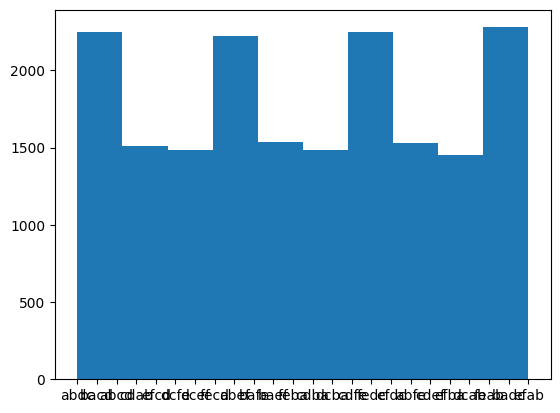

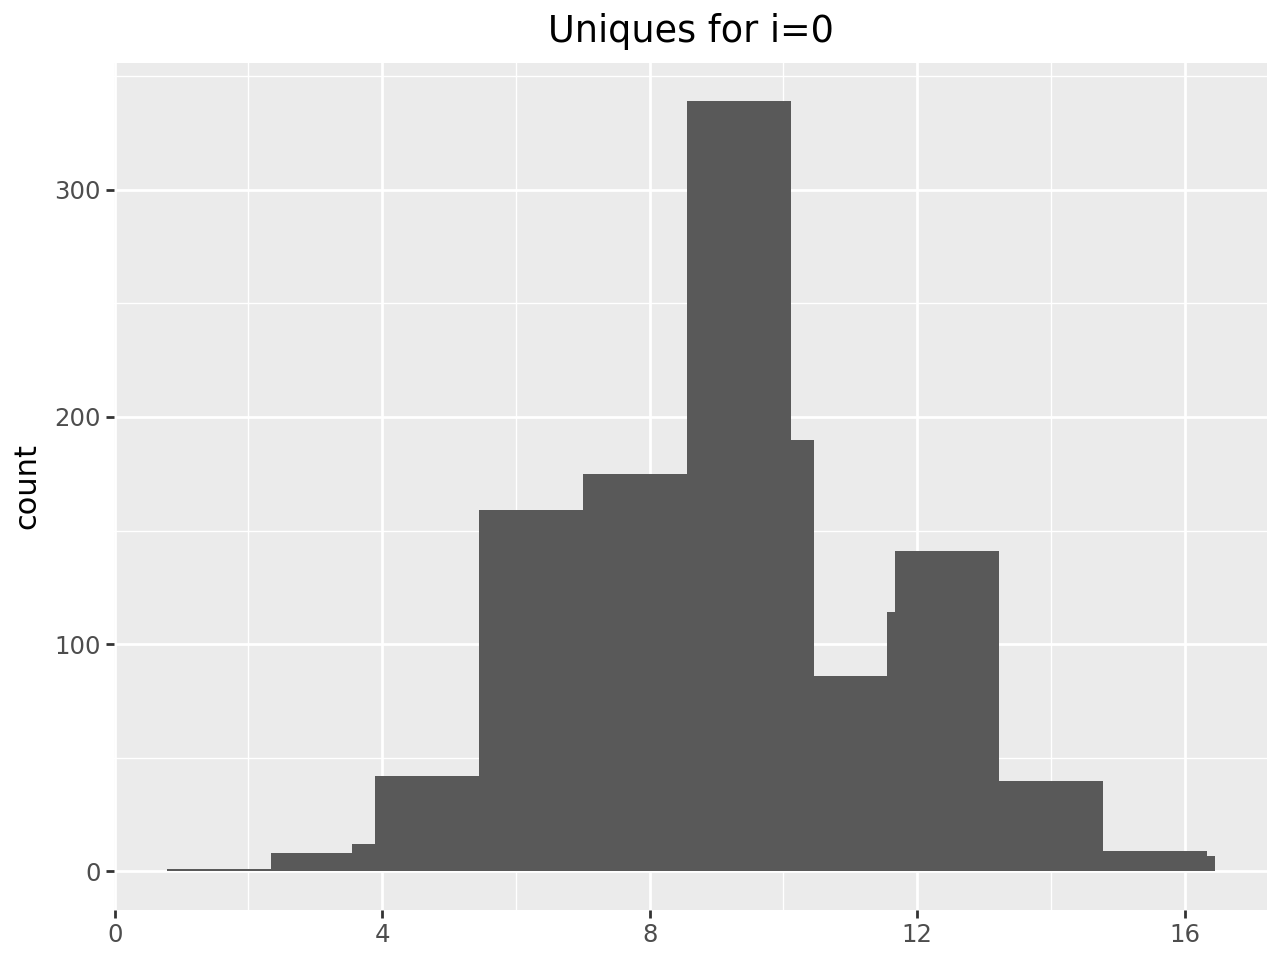

Mean: 9.277
Lower 95 CI: 4.542499023181059
Upper 95 CI: 14.01150097681894


C:\Users\kulka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\plotnine\ggplot.py:606: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\kulka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\plotnine\ggplot.py:607: PlotnineWarning: Filename: C:\Users\kulka\Documents\Dedhe Internship\cogsci-code\20240603 Language Of Thought Modeling\uniques0.png


In [6]:
#Visualization
for i in range(1):
    plt.hist(myset[i])
    plt.show()
    
    
    """
    sa = pd.DataFrame(sim_avgs)
    plot_sa = ggplot(sa) + aes(x=sa[0]) + stat_bin(bins=1000) + geom_bar() + ggtitle(f'Simulation Averages for i={i}')
    plot_sa.show()
    print(sa.describe())
    std = sa[0].std()
    mean = sa[0].mean()
    print("Lower 95 CI:", mean - 2 * std)
    print("Upper 95 CI:", mean + 2 * std)
    plot_sa.save(filename="sim_avg" + str(i) + ".png", path=os.getcwd())
    """
    
    un = pd.DataFrame(uniques[i])
    plot_un = ggplot(un) + aes(x=un[0]) + stat_bin(bins=10) + geom_bar() + ggtitle(f'Uniques for i={i}')
    plot_un.show()  # Display the plot
    stdu  = un[0].std()
    meanu = un[0].mean()
    print("Mean:",meanu)
    print("Lower 95 CI:", meanu - 2 * stdu)
    print("Upper 95 CI:", meanu + 2 * stdu)
    plot_un.save(filename="uniques" + str(i) + ".png", path=os.getcwd())